# `diffequ-manual.jl`

To begin, we run the following code so we can print our plots:

In [45]:
using Plots; gr();

Recalling that our differential equation is in the form of

$$ \dot{X} = f(t), X(0) = 0 $$

where $f(t) = \cos{2\pi t} + C$ and $C$ is an random float value on the open interval $(0,1)$, we define our function $X(t)$ as follows:

In [46]:
C = randn(1)[1];
function X(t)
    X = 1/(2*pi)*sin(2*pi*t) + C*t;
end

X (generic function with 1 method)

This establishes the function

$$ X(t) = \dfrac{1}{2\pi}\sin{2\pi t} + Ct $$

within our `diffequ-manual.jl` file.

$$ \sim $$

We're interested in the time interval between $t = 0$ and $t = 10$ with a stepsize of $\Delta t = 0.1$ To a create an array of $t$-values we can run the following code:

In [47]:
t_list = collect(range(0,stop=10,step=0.1));
N = size(t_list)[1];

We now have a $ 1 \times N $ array of the necessary $t$-values. To create the an array of the values of $X(t)$, we can use the following `for` loop:

In [48]:
X_list = zeros(1,N);
for j = 1:N
    X_list[j] = X(t_list[j]);
end
X_list = X_list';

The final line `X_list = X_list'` vectorizes our `X_list` variable, which ensures it's the same dimensions as our `t_list` for plotting purposes. We can now go ahead and plot our function:

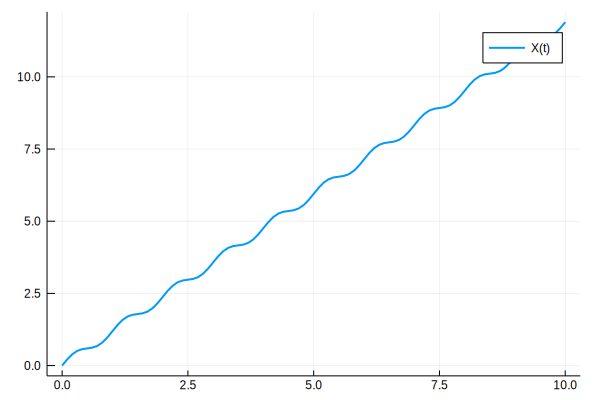

In [49]:
plot(t_list,X_list,lw=2,label="X(t)")

$$\sim$$

# Interactive Plots

Before we turn to using the `DifferentialEquations.jl` as an alternate method to solve a differential equation, let's make our previous plot more interactive! For this, we'll be creating a slider (using the `Interact` package) which alters the $t$ interval!

In [50]:
using Interact; Colors
@manipulate for Time = 0:0.1:10
    plot([t -> sin(2*pi*t)/(2*pi)+C*t],0,Time)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:Time=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
51,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "9.1", "9.2", "9.3", "9.4", "9.5", "9.6", "9.7", "9.8", "9.9", "10.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"5.0",:value=>Observable{Float64} with 2 listeners. Value:
5.0), Observable{Float64} with 2 listeners. Value:
5.0, Scope("knockout-component-a53c4e5f-f087-4387-9a24-3bb6f65f6b96", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["Time"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "9.1", "9.2", "9.3", "9.4", "9.5", "9.6", "9.7", "9.8", "9.9", "10.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"5.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\luiss\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\luiss\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\luiss\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\all.js", "C:\\Users\\luiss\\.julia\\packages\\InteractBase\\PTCUD\\src\\..\\assets\\style.css", "C:\\Users\\luiss\\.julia\\packages\\InteractBulma\\PH56C\\src\\..\\assets\\main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\

Now we have an interactive plot!

$$\sim$$

# Using `DifferentialEquations.jl`

Although the solution we derived using separation of variables is correct, it becomes inconvenient to have to manually solve our differential equations. Luckily, we have the convenient alternative of using the `DifferentialEquations.jl` package. Let's go ahead an initialize it.

In [7]:
using DifferentialEquations

In order to initialize our desired differential equation within Julia, we simply assign it to the "variable" `f(u,p,t)`:

In [62]:
f(u,p,t) = sin(2.0*pi*u)

f (generic function with 1 method)

Here, we have no concerns regarding parameters (`p` variable), and we define our $t$-span (`t`) immediately after, so only `u` appears in our declaration. In addition to defining our time interval of interest, we must also provide an initial condition (we'll just use the one above again, i.e. $X(0) = 0$).

In [63]:
u0 = 0.0;
tspan = (0.0,10.0);

The `DifferentialEquations` package allows us to define the type of differential equation we're solving. In this case, we have a *first order linear homogeneous differential equation*, so we define our "problem" as follows:

In [64]:
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 0.0

Here, all of our variables pop up, which makes since since we would need all three of *these* parameters if we were to solve by separation of varables, as we did previously. Moving on, our solution can be obtained as follows:

In [65]:
solution = solve(prob,saveat=0.1);

As we can note from our output (omitted for brevity), `sol` is a function containing arrays of our $t$ and $X(t)$ values. Important to note is the `saveat` parameter, which defines the stepsize at which the `DifferentialEquations` package 'saves' the $X(t)$ values. Since we wanted a stepsize of $\Delta t = 0.1$, we assign a value of `0.1`. We can now plot our lovely graph:

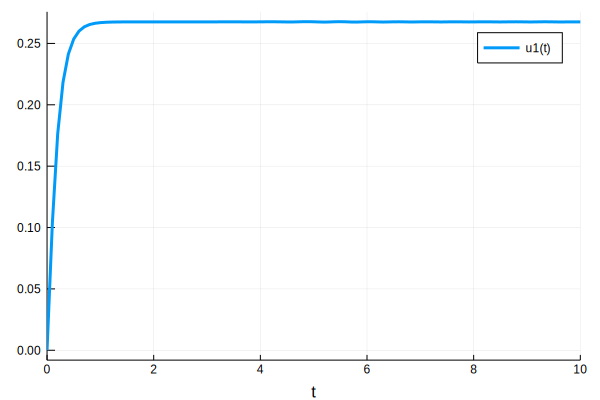

In [66]:
plot(sol)

We can also compare our solutions to each other as follows:

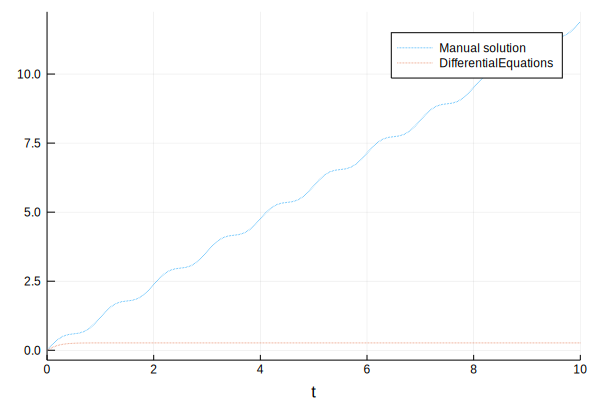

In [67]:
plot(t_list,X_list,lw=1,linestyle=:dot,label="Manual solution")
plot!(sol,lw=1,linestyle=:dot,label="DifferentialEquations")